In [1]:
import numpy as np  
# import numpy as np
from scipy.signal import butter
import matplotlib.pyplot as plt

In [2]:
def white_noise_nk2(
        signal,  noise_amplitude=0.1, model='gaussian'
        ):
    """maybe need to check the nyquist """
    signal_sd = np.std(signal, ddof=1)
    amp = signal_sd * noise_amplitude

    if model.lower() == 'gaussian':
        _noise = np.random.normal(0, amp, len(signal))
    elif model.lower() == 'laplace':
        _noise = np.random.laplace(0, amp, len(signal))
    
    return _noise

In [3]:
def band_limited_white_noise_nk2(
    signal, noise_amplitude, sampling_rate, lowcut, highcut, order=4
    ):
    # Generate white noise
    signal_sd = np.std(signal, ddof=1)
    amp = signal_sd * noise_amplitude
    _noise = np.random.normal(0, amp, len(signal))
    
    # Define bandpass filter parameters
    b, a = butter(order, [lowcut, highcut], btype='band', fs=sampling_rate)
    
    _band_limited_noise = signal.lfilter(b, a, _noise)
    
    return _band_limited_noise

# 和上面的白噪声一样，没有考虑过noise_freq和noise_duration，可能后期需要大改

In [4]:
def impulsive_noise(
    signal, noise_amplitude, rate=None, number=None
):
    signal_sd = np.std(signal, ddof=1)
    amp = signal_sd * noise_amplitude
    num_samples = len(signal)

    # rate or number
    if rate is not None and number is None:
        pob = [1 - rate, rate]
    elif rate is None and number is not None:
        pob_rate = number / num_samples
        if pob_rate >= 1.0:
            pob_rate = 1
        pob = [1 - pob_rate, pob_rate]
    else:  
        return None

    impulsive_noise = np.random.choice([0, 1], size=num_samples, p=pob) * np.random.normal(0, amp, num_samples)
    
    return impulsive_noise


# signal_length = 1000
# num_transients = 5
# max_amplitude = 10
# transient_duration = 50

# # generate the signal with transient noise pulses
# signal_with_transients = generate_transient_signal(signal_length, num_transients, max_amplitude, transient_duration)

# # plot the original signal and the signal with transients
# plt.figure(figsize=(10, 6))
# plt.plot(signal_with_transients, label='signal with transients')
# plt.xlabel('time')
# plt.ylabel('amplitude')
# plt.title('signal with transient noise pulses')
# plt.legend()
# plt.grid(true)
# plt.show()


In [5]:
# def transient_signal(signal_length, num_transients, max_amplitude, transient_duration):
#     time = np.arange(0, signal_length)
#     signal = np.zeros(signal_length)
    
#     for _ in range(num_transients):
#         start_idx = np.random.randint(0, signal_length - transient_duration)
#         amplitude = np.random.uniform(0, max_amplitude)
#         transient = amplitude * np.random.normal(size=transient_duration)
#         signal[start_idx:start_idx + transient_duration] += transient
    
#     return signal

# # Parameters for the simulation
# signal_length = 1000
# num_transients = 5
# max_amplitude = 10
# transient_duration = 50

# # Generate the signal with transient noise pulses
# signal_with_transients = generate_transient_signal(signal_length, num_transients, max_amplitude, transient_duration)

# # Plot the original signal and the signal with transients
# plt.figure(figsize=(10, 6))
# plt.plot(signal_with_transients, label='Signal with Transients')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('Signal with Transient Noise Pulses')
# plt.legend()
# plt.grid(True)
# plt.show()


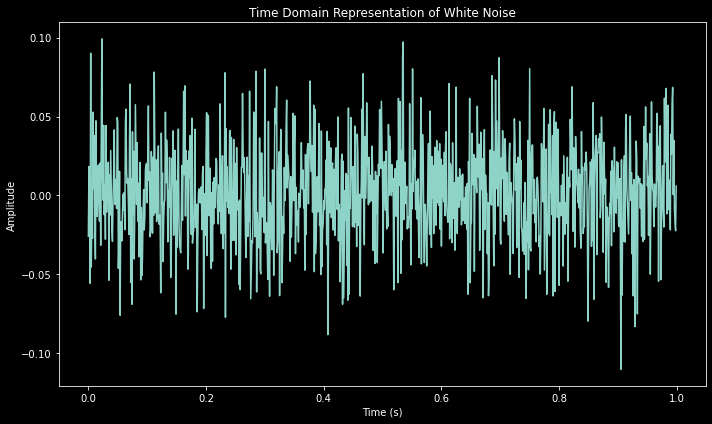

In [6]:

# 定义模拟参数
duration = 1.0  # 模拟的时间长度（秒）
sampling_rate = 1000  # 采样率（每秒的采样数）
num_samples = int(duration * sampling_rate)  # 总样本数

# 定义频谱密度函数（这里假设是常数）
def spectral_density(frequency):
    return 1.0  # 这里假设频谱密度为常数

# 生成频率范围
frequency_range = np.fft.fftfreq(num_samples, d=1.0/sampling_rate)

# 计算频谱密度在频率范围内的值
spectral_density_values = spectral_density(frequency_range)

# 生成复数噪声信号，以保持相位信息
complex_noise = np.random.normal(size=num_samples) + 1j * np.random.normal(size=num_samples)

# 缩放复数噪声信号的振幅，以匹配频谱密度
scaled_complex_noise = complex_noise * np.sqrt(spectral_density_values)

# 进行逆傅里叶变换，得到时间域的噪声信号
time_domain_noise = np.fft.ifft(scaled_complex_noise).real

# 绘制噪声信号的时域和频域图
plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
plt.plot(np.arange(num_samples) / sampling_rate, time_domain_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Representation of White Noise')

# plt.subplot(2, 1, 2)
# plt.plot(frequency_range, spectral_density_values)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Spectral Density')
# plt.title('Spectral Density of White Noise')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Pink Noise (1/f Noise) - Time Domain')

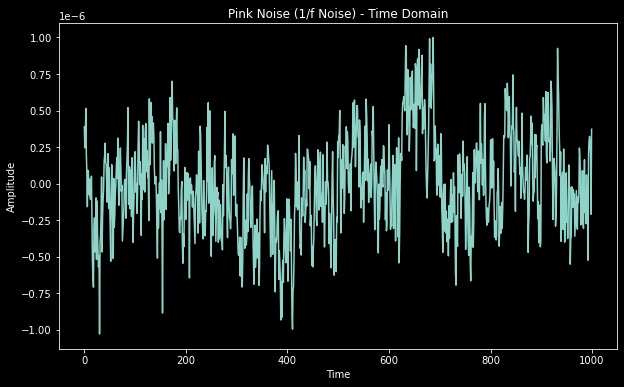

In [10]:
def spectral_density(frequency_range, Magnitude, noise_exponent):
    return Magnitude / (frequency_range ** noise_exponent)

def pink_noise(sampling_rate, duration, Magnitude=1, noise_exponent=1, noise_max=1):
    
    num_samples = int(sampling_rate * duration)
    frequency_range = np.fft.fftfreq(num_samples)[1: num_samples //2 ]
    _spectral_density = spectral_density(frequency_range, Magnitude, noise_exponent)
    random_phases = np.random.uniform(0, 2 * np.pi, len(frequency_range))
    spectrum = np.sqrt(_spectral_density) * np.exp(1j * random_phases)
    _pink_noise = np.fft.irfft(spectrum, n=num_samples)
    scaling = _pink_noise.max() / noise_max
    _pink_noise /= scaling

    return _pink_noise

_pink_noise = pink_noise(sampling_rate=100, duration=10, Magnitude=1, noise_exponent=1, noise_max=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(_pink_noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Pink Noise (1/f Noise) - Time Domain')

In [8]:
def generate_burst_noise(
        signal, noise_amplitude, burst_num_max, burst_durations=[10, 50], burst_intervals=[100, 300]
        ):

    signal_length = len(signal_length)

    _noise = np.zeros(signal_length)
    signal_sd = np.std(signal, ddof=1)

    amp = noise_amplitude * signal_sd

    burst_start = np.random.randint(0, (signal_length - burst_durations[1] + 1 )// burst_num_max)

    for _ in range(burst_num_max):
        burst_duration = np.random.uniform(burst_durations[0], burst_durations[1])
        burst_end = burst_start + burst_duration

        if burst_end >= signal_length:
            break
        
        burst_interval = np.random.uniform(burst_intervals[0], burst_intervals[1])
        burst_start = burst_end + burst_interval

        _noise[burst_start: burst_end] += np.random.normal(0, amp)
    return _noise